# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Attribute Information:
* age
* sex
* cp = chest pain type (4 values)
* trestbps = resting blood pressure
* chol = serum cholestoral in mg/dl
* fbs = fasting blood sugar > 120 mg/dl
* restecg = resting electrocardiographic results (values 0,1,2)
* thalach = maximum heart rate achieved
* exang = exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
* ca = number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

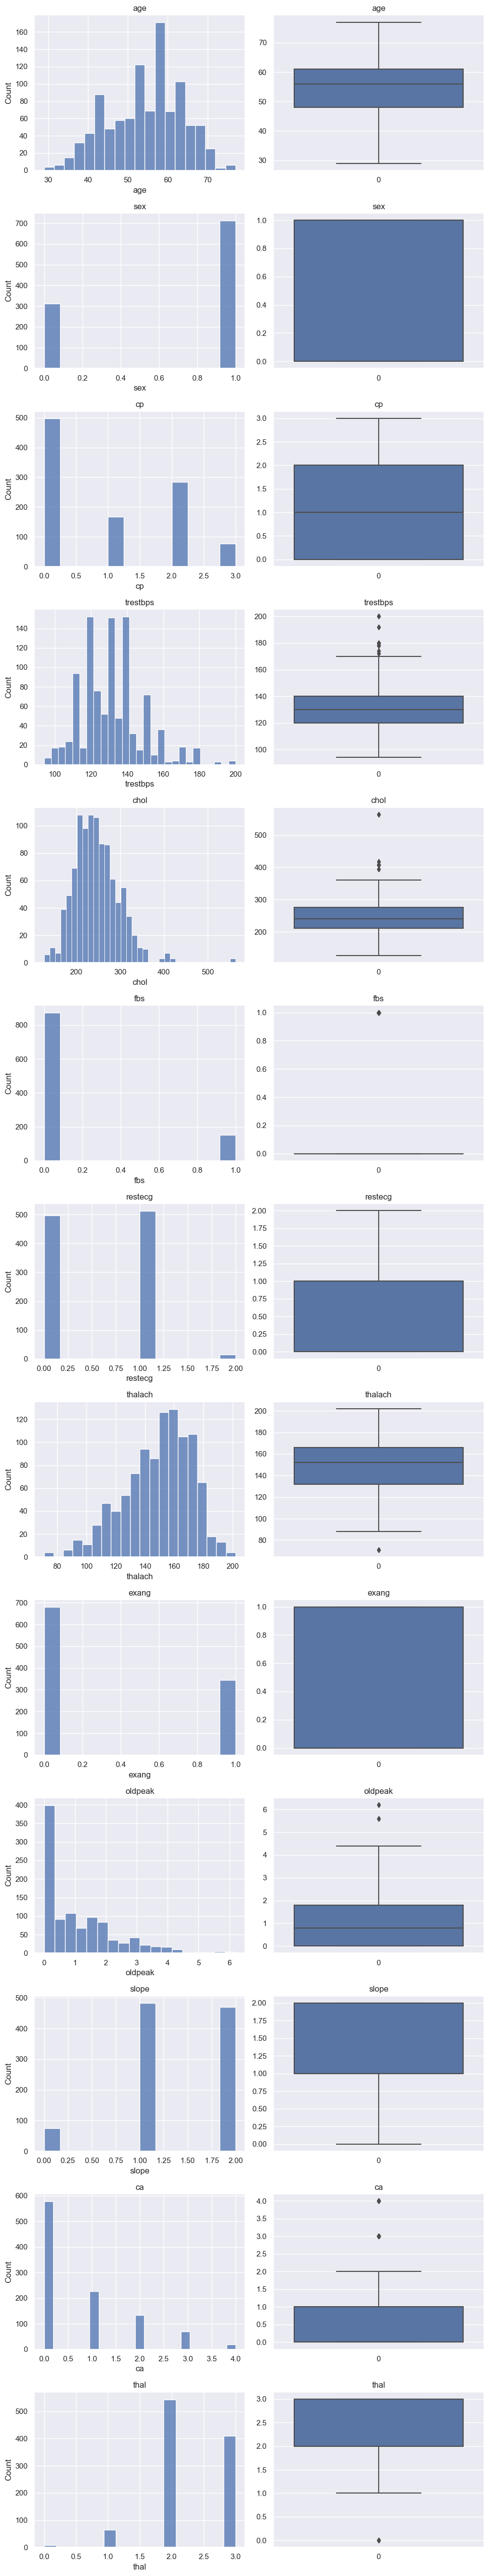

In [10]:
# Set the Seaborn theme
sns.set_theme()

# Define the list of features to plot
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create subplots for each feature
fig, axes = plt.subplots(nrows = len(features), ncols = 2, figsize = (10, 4*len(features)))

# Loop over each feature and plot a histogram and boxplot
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(feature)

    sns.boxplot(data=df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(feature)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='target', ylabel='count'>

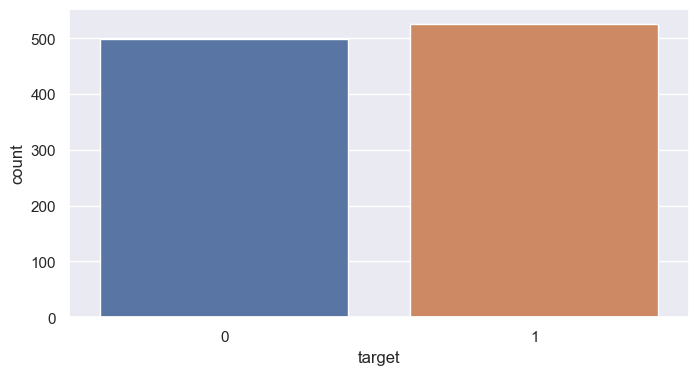

In [11]:
# check number of healthy and defective people
plt.figure(figsize=(8,4))
sns.set_theme()
sns.countplot(data=df,x='target')

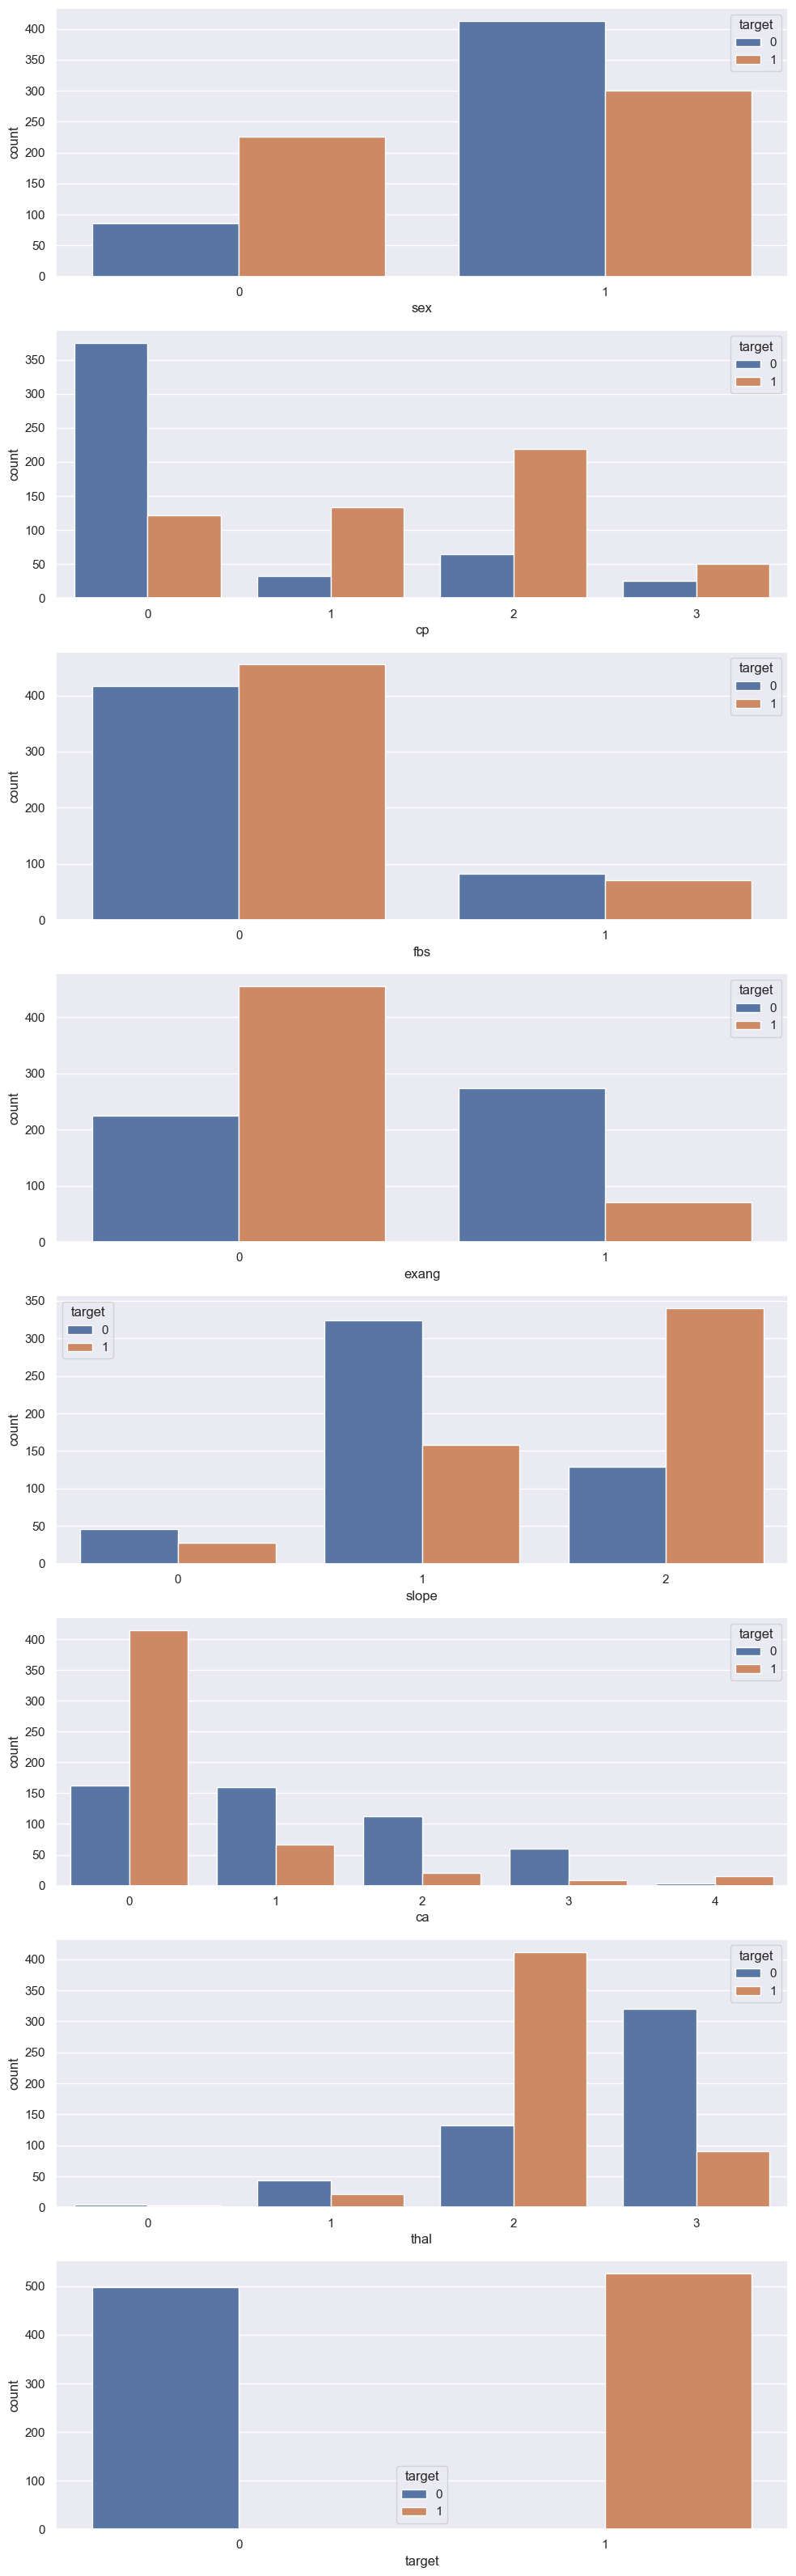

In [12]:
# see the relation between the features and target
sns.set_theme()

# Define the list of features to plot
features = ['sex', 'cp','fbs','exang','slope', 'ca', 'thal', 'target']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 4*len(features)))

# Loop over each feature and plot a countplot
for i, feature in enumerate(features):
    sns.countplot(x=df[feature],hue=df['target'] ,ax=axes[i])


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [13]:
heart_disease=df['target'].value_counts()
heart_disease.index=['Disease','No-Disease']

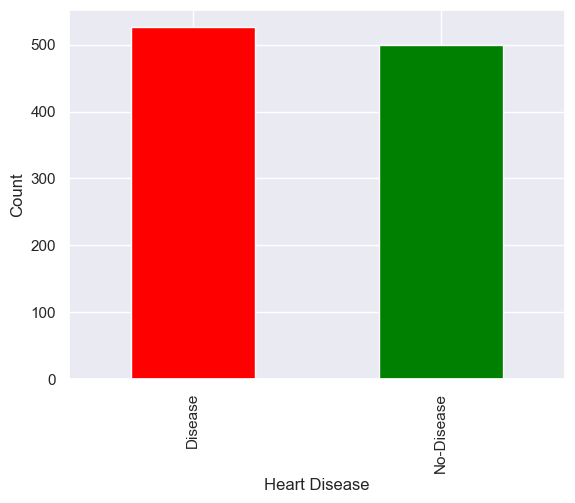

In [14]:
ax=heart_disease.plot(kind='bar',color=['red','green'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

## Find Count of Male & Female in this Dataset

In [15]:
gender=df['sex'].value_counts()
index=['Male','Female']
gender.index=index

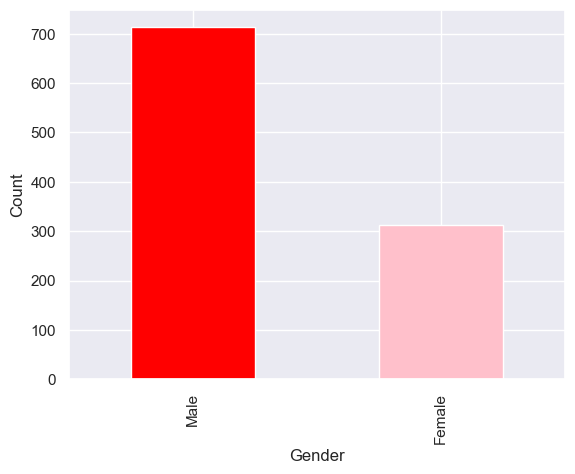

In [16]:
ax=gender.plot(kind='bar',color=['red','pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Find Gender Distribution According to The Target Variable

In [17]:
s=df[['sex','target']].value_counts()
s

sex  target
1    0         413
     1         300
0    1         226
     0          86
dtype: int64

In [18]:
s={
    'sex':[1,1,0,0],
    'target':[0,1,1,0],
    'count':[114,92,72,24]
}
data=pd.DataFrame(s)

In [19]:
pivot_df=data.pivot(index='sex',columns='target',values='count')

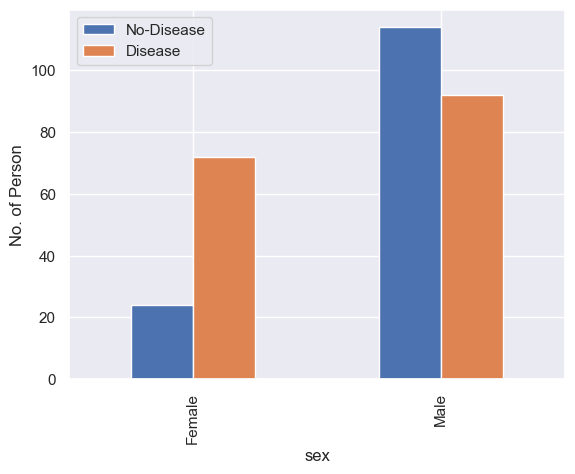

In [20]:
pivot_df.plot(kind='bar')
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.xlabel('sex')
plt.ylabel('No. of Person')
plt.show()

## Check Age Distribution In The Dataset

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

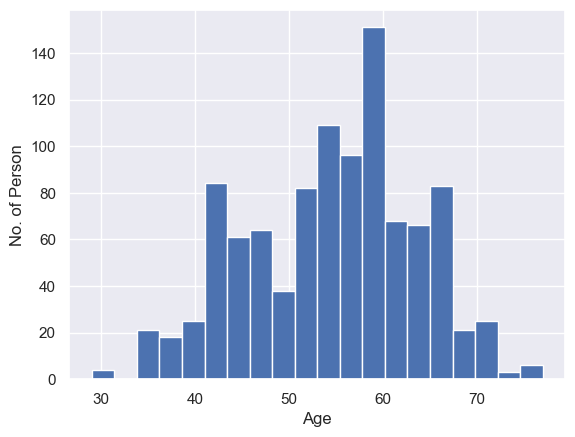

In [22]:
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('No. of Person')
plt.show()

##  Check Chest Pain Type

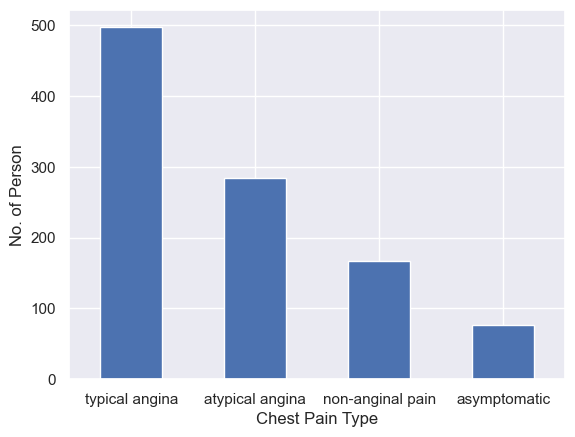

In [23]:
df['cp'].value_counts().plot(kind='bar')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=0)
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Person')
plt.show()

## Show The Chest Pain Distribution As Per Target Variable

In [24]:
data1=pd.DataFrame(df[['cp','target']].value_counts())
data1.reset_index(inplace=True)

In [25]:
data1=data1.pivot(index='cp',columns='target',values=0)

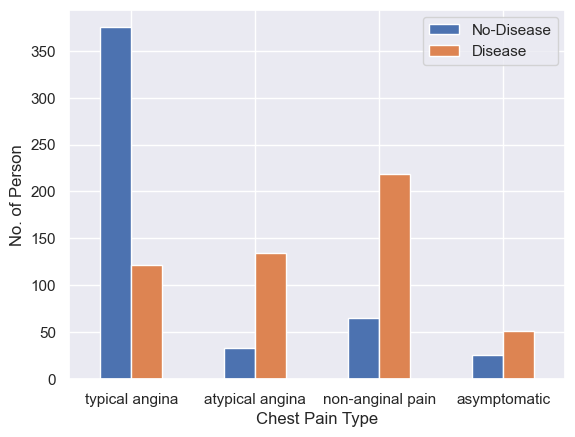

In [26]:
data1.plot(kind='bar')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"],rotation=0)
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Person')
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## Show Fasting Blood Sugar Distribution According To Target Variable

In [27]:
data2=pd.DataFrame(df[['fbs','target']].value_counts())
data2.reset_index(inplace=True)

In [28]:
data2=data2.pivot(index='fbs',columns='target',values=0)

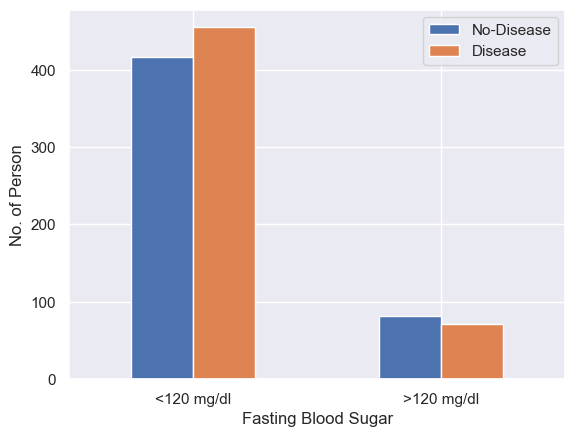

In [29]:
data2.plot(kind='bar')
plt.xticks([0,1],["<120 mg/dl",">120 mg/dl"],rotation=0)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('No. of Person')
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## Check Resting Blood Pressure Distribution

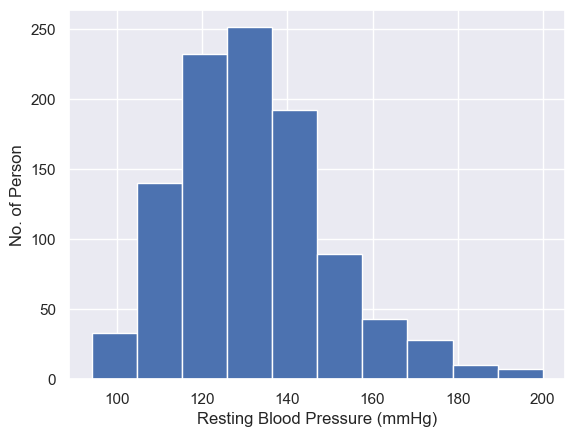

In [30]:
df['trestbps'].hist()
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('No. of Person')
plt.show()

## Show Distribution of Serum cholesterol

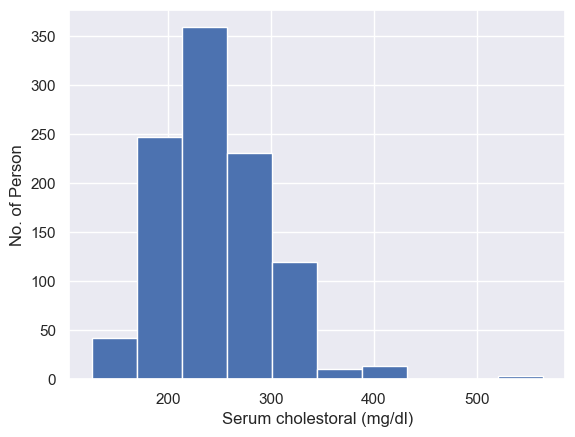

In [31]:
df['chol'].hist()
plt.xlabel('Serum cholestoral (mg/dl)')
plt.ylabel('No. of Person')
plt.show()

## Plot Continuous Variables

In [32]:
cont_var=[]
for column in df.columns:
    if df[column].nunique() >10:
        cont_var.append(column)

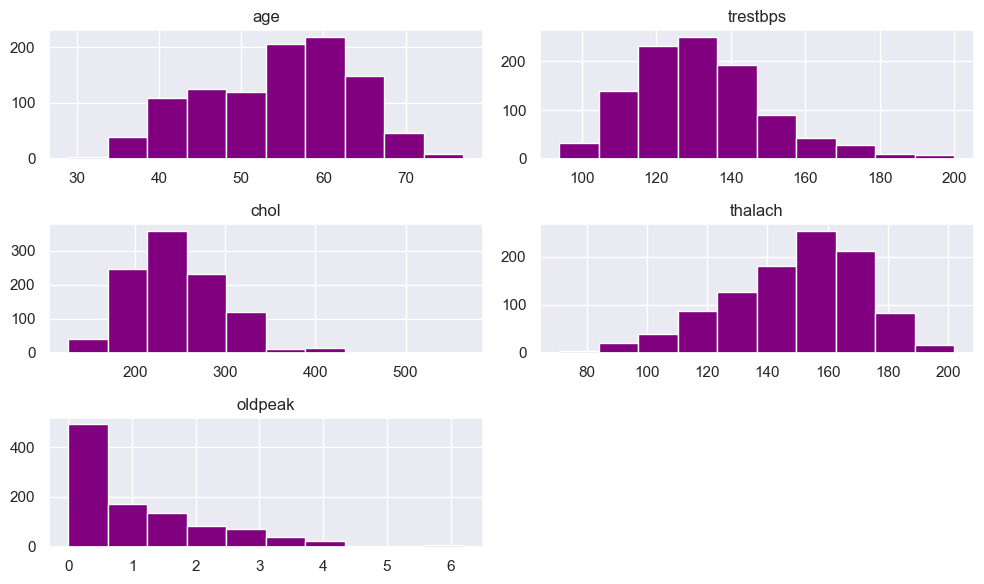

In [33]:
df.hist(cont_var, color='purple',figsize=(10,6))
plt.tight_layout()
plt.show()

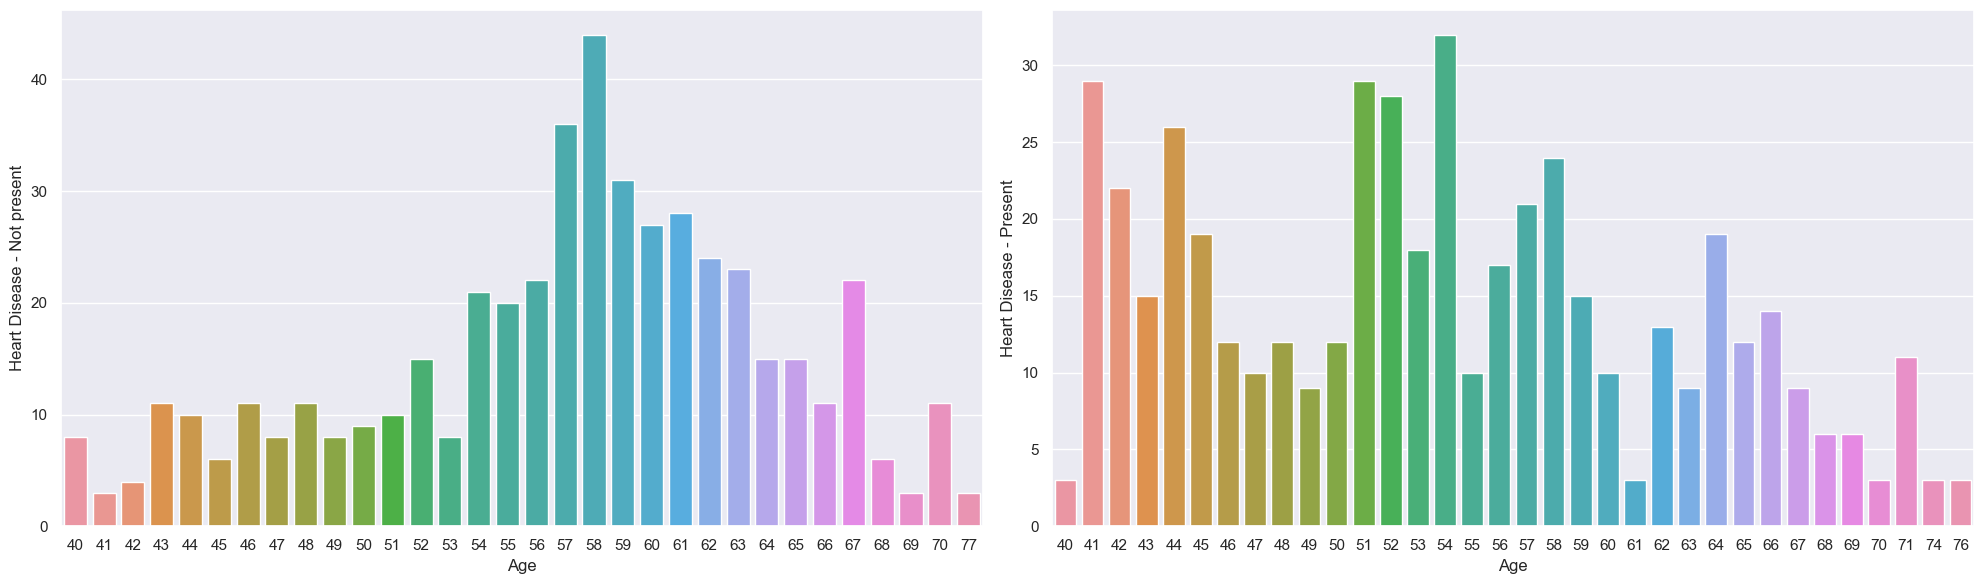

In [34]:
sns.set_theme()

# Create subplots for the two countplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Plot the count of age when target is 0
sns.countplot(x='age', data=df[(df['age'] >= 40) & (df['target'] == 0)], ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Heart Disease - Not present')

# Plot the count of age when target is 1
sns.countplot(x='age', data=df[(df['age'] >= 40) & (df['target'] == 1)], ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Heart Disease - Present')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [35]:
corr = df.corr()

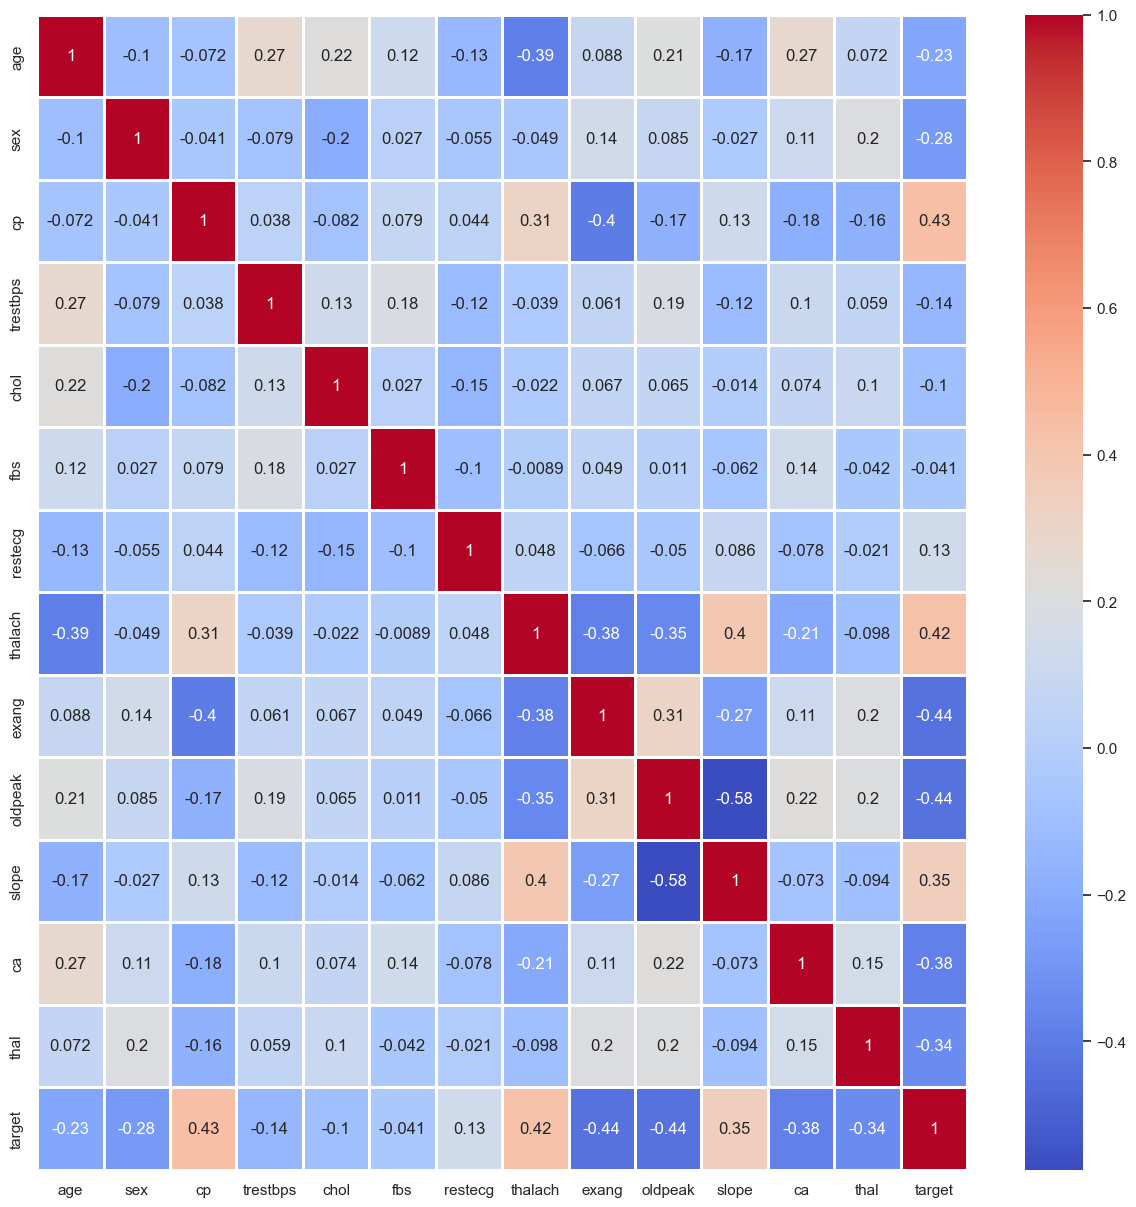

In [36]:
plt.figure(figsize= (15,15))
sns.heatmap(corr, linewidth=1,annot=True,linecolor='white',cmap='coolwarm');

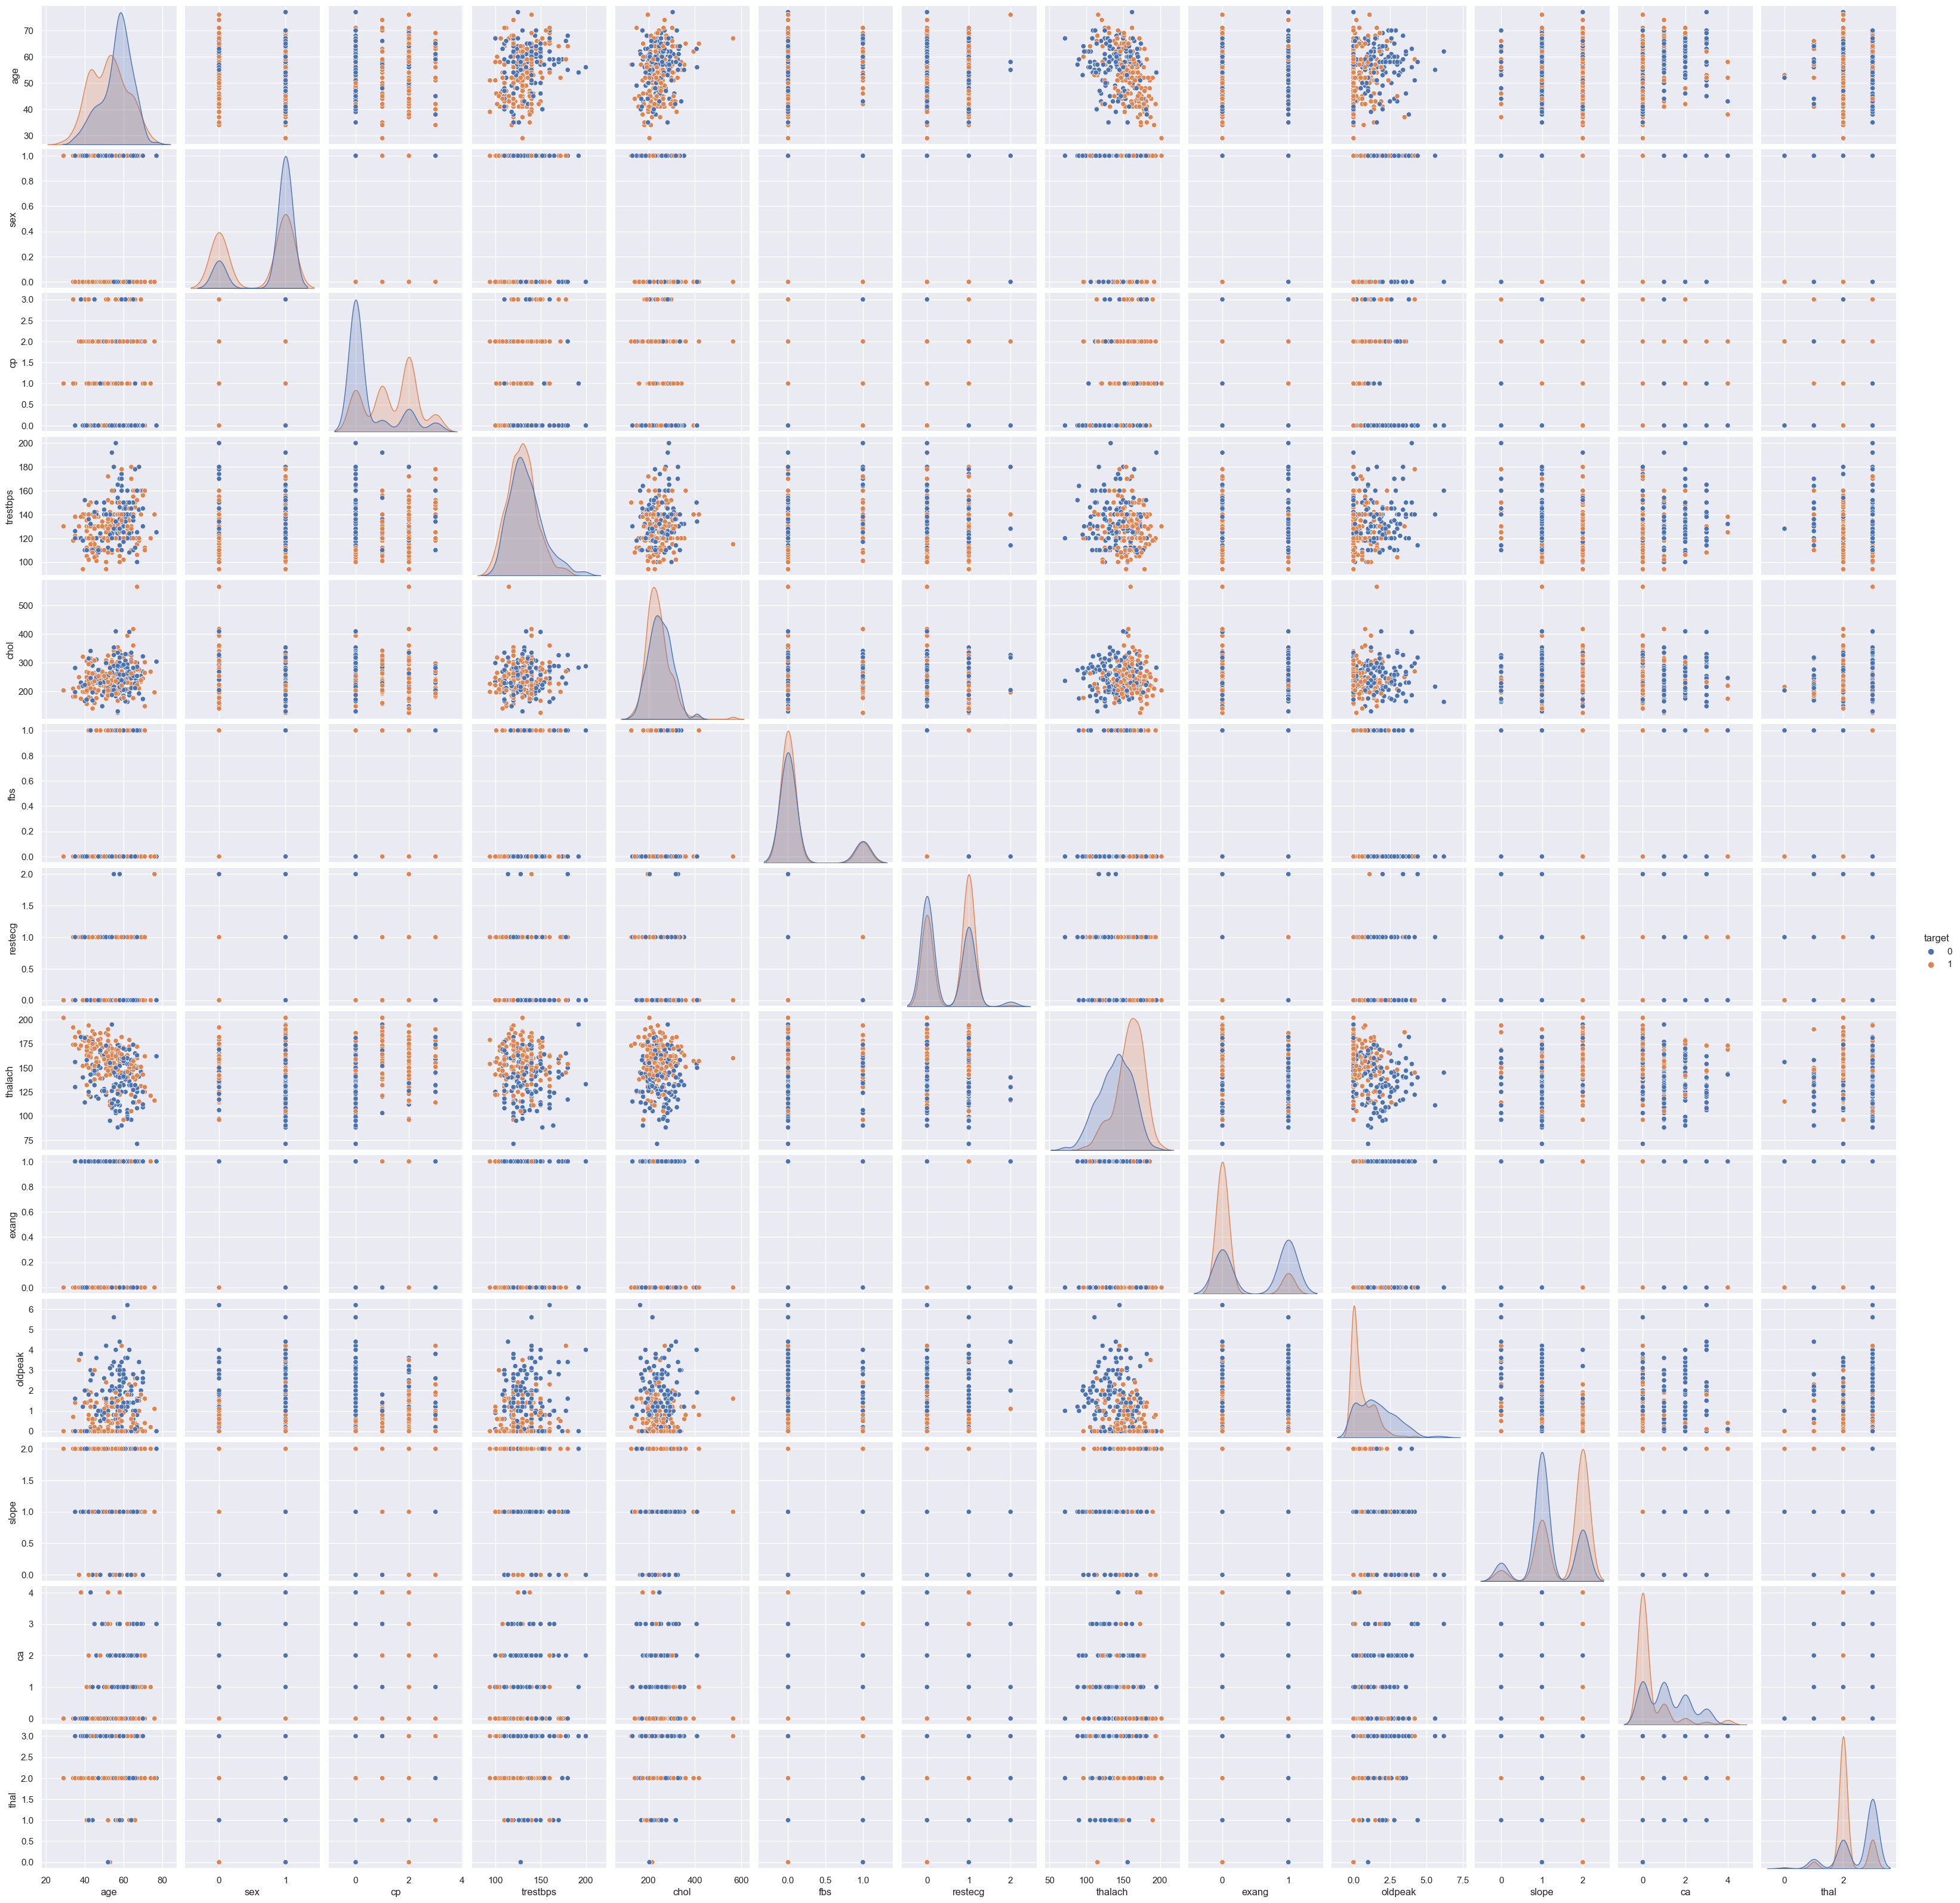

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:ylabel='sex'>

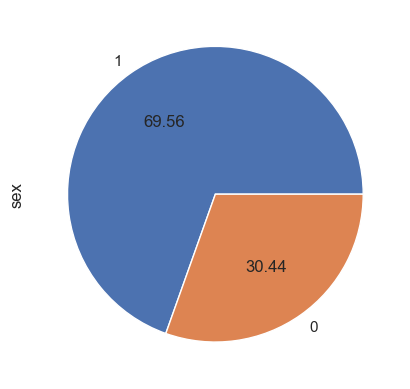

In [38]:
#Pie chart showing the percentage of male patients vs female
df['sex'].value_counts().plot.pie(autopct='%.2f')

In [39]:
# Defining the independent X variables and dependent y variables
X=df.drop(['target'],axis=1)
Y=df['target']

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [44]:
from sklearn.linear_model import  LogisticRegression

In [45]:
lr=LogisticRegression()
model_lr=lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [47]:
cm_lr=confusion_matrix(y_test,pred_lr)
print("Confusion Matrix   :", cm_lr)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy   :", accuracy_lr)
precision_lr = precision_score(y_test, pred_lr)
print("Precision :", precision_lr)
recall_lr = recall_score(y_test, pred_lr)
print("Recall    :", recall_lr)
F1_score_lr = f1_score(y_test, pred_lr)
print("F1-score  :", F1_score_lr)

Confusion Matrix   : [[112  47]
 [ 16 133]]
Accuracy   : 0.7954545454545454
Precision : 0.7388888888888889
Recall    : 0.8926174496644296
F1-score  : 0.8085106382978723


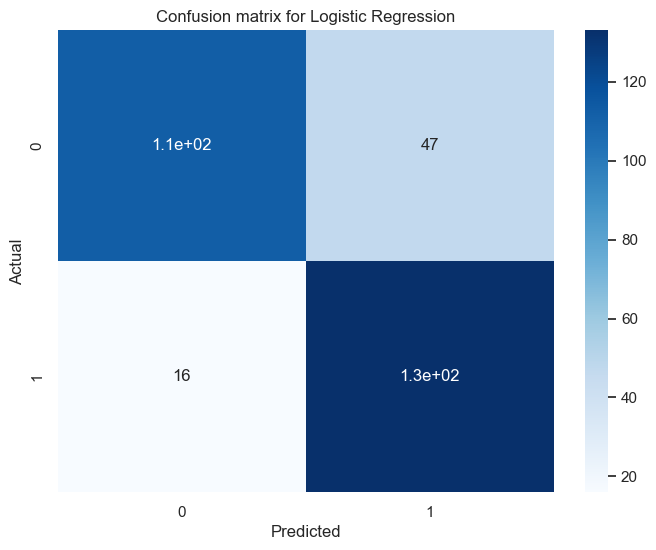

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
cm_rf=confusion_matrix(y_test,pred_rf)
print("Confusion Matrix   :", cm_rf)
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy   :", accuracy_rf)
precision_rf = precision_score(y_test, pred_rf)
print("Precision :", precision_rf)
recall_rf = recall_score(y_test, pred_rf)
print("Recall    :", recall_rf)
F1_score_rf = f1_score(y_test, pred_rf)
print("F1-score  :", F1_score_rf)

Confusion Matrix   : [[128  31]
 [  8 141]]
Accuracy   : 0.8733766233766234
Precision : 0.8197674418604651
Recall    : 0.9463087248322147
F1-score  : 0.8785046728971962


# Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC
svc =  SVC(C=2)
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
cm_svm=confusion_matrix(y_test,pred_svm)
print("Confusion Matrix   :", cm_svm)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy   :", accuracy_svm)
precision_svm = precision_score(y_test, pred_svm)
print("Precision :", precision_svm)
recall_svm = recall_score(y_test, pred_svm)
print("Recall    :", recall_svm)
F1_score_svm = f1_score(y_test, pred_svm)
print("F1-score  :", F1_score_svm)

Confusion Matrix   : [[142  17]
 [  7 142]]
Accuracy   : 0.922077922077922
Precision : 0.8930817610062893
Recall    : 0.9530201342281879
F1-score  : 0.922077922077922


# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
cm_knn=confusion_matrix(y_test,pred_knn)
print("Confusion Matrix   :", cm_knn)
accuracy_knn = accuracy_score(y_test, pred_knn)
print("Accuracy   :", accuracy_knn)
precision_knn = precision_score(y_test, pred_knn)
print("Precision :", precision_knn)
recall_knn = recall_score(y_test, pred_knn)
print("Recall    :", recall_knn)
F1_score_knn= f1_score(y_test, pred_knn)
print("F1-score  :", F1_score_knn)

Confusion Matrix   : [[131  28]
 [ 14 135]]
Accuracy   : 0.8636363636363636
Precision : 0.8282208588957055
Recall    : 0.9060402684563759
F1-score  : 0.8653846153846153


# Extreme Gradient Boosting (XG Boost)

In [52]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.05, n_estimators=100, max_depth=15)
xg.fit(X_train, y_train)
pred_xg = xg.predict(X_test)
cm_xg=confusion_matrix(y_test,pred_xg)
print("Confusion Matrix   :", cm_xg)
accuracy_xg = accuracy_score(y_test, pred_xg)
print("Accuracy   :", accuracy_xg)
precision_xg = precision_score(y_test, pred_xg)
print("Precision :", precision_xg)
recall_xg = recall_score(y_test, pred_xg)
print("Recall    :", recall_xg)
F1_score_xg = f1_score(y_test, pred_xg)
print("F1-score  :", F1_score_xg)

Confusion Matrix   : [[156   3]
 [  3 146]]
Accuracy   : 0.9805194805194806
Precision : 0.9798657718120806
Recall    : 0.9798657718120806
F1-score  : 0.9798657718120806


In [53]:
#logistic regression
result1 = ["1.","Logistic Regression"]
result1.append(round(accuracy_lr*100,2))
result1.append(round(precision_lr*100,2))
result1.append(round(recall_lr*100,2))
result1.append(round(F1_score_lr*100,2))

#random forest classifier
result2 = ["2.","Random Forest Classifier"]
result2.append(round(accuracy_rf*100,2))
result2.append(round(precision_rf*100,2))
result2.append(round(recall_rf*100,2))
result2.append(round(F1_score_rf*100,2))

#support vector machine
result3 = ["3.","Support Vector Machine"]
result3.append(round(accuracy_svm*100,2))
result3.append(round(precision_svm*100,2))
result3.append(round(recall_svm*100,2))
result3.append(round(F1_score_svm*100,2))

#knn
result4 = ["4.","K Nearest Neighbours"]
result4.append(round(accuracy_knn*100,2))
result4.append(round(precision_knn*100,2))
result4.append(round(recall_knn*100,2))
result4.append(round(F1_score_knn*100,2))

#xg boost
result5 = ["5.","XG Boost"]
result5.append(round(accuracy_xg*100,2))
result5.append(round(precision_xg*100,2))
result5.append(round(recall_xg*100,2))
result5.append(round(F1_score_xg*100,2))

In [54]:
! pip install prettytable

In [55]:
from prettytable import PrettyTable

## Result Table

In [56]:
Result_table = PrettyTable(["S.No.","Model","Accuracy","Precison","Recall","F1 Score"])
Result_table.add_row(result1)
Result_table.add_row(result2)
Result_table.add_row(result3)
Result_table.add_row(result4)
Result_table.add_row(result5)
print(Result_table)

+-------+--------------------------+----------+----------+--------+----------+
| S.No. |          Model           | Accuracy | Precison | Recall | F1 Score |
+-------+--------------------------+----------+----------+--------+----------+
|   1.  |   Logistic Regression    |  79.55   |  73.89   | 89.26  |  80.85   |
|   2.  | Random Forest Classifier |  87.34   |  81.98   | 94.63  |  87.85   |
|   3.  |  Support Vector Machine  |  92.21   |  89.31   |  95.3  |  92.21   |
|   4.  |   K Nearest Neighbours   |  86.36   |  82.82   |  90.6  |  86.54   |
|   5.  |         XG Boost         |  98.05   |  97.99   | 97.99  |  97.99   |
+-------+--------------------------+----------+----------+--------+----------+


## Conclusion

SVM and XG Boost have been able to explain the model better with higher accuracy and F1 Score thus would serve as a better model for Heart Disease Prediction

In [57]:
#Build a Predictive System

#input_data=[46,0,2,142,177,0,0,160,1,1.4,0,0,2]#does have a heart disease
input_data=[58,0,0,100,248,0,0,122,0,1,1,0,2]#does have a heart disease
input_data1=[67,1,0,160,286,0,0,108,1,1.5,1,3,2]#does not have a heart disease

#change input data into numpy array
input_data_as_array=np.asarray(input_data)

#reshape the numpy array as we predict for only one instance
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = xg.predict(input_data_reshaped)

if(prediction[0]==0):
  print("the person does not have a heart disease")
else:
    print("the person does have a heart disease")

the person does not have a heart disease
